In [3]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mylib.local_path import figpath
from mylib.maze_utils3 import mkdir
from mylib.dsp.starting_cell import get_initial_traj
from mylib.dsp.neural_traj import visualize_neurotraj3d, preprocess_neural_traj

code_id = '0821 - Egocentric Neural Traj'
loc = os.path.join(figpath, 'Dsp', code_id)
mkdir(loc)

with open(r"E:\Data\Dsp_maze\10224\20231012\trace.pkl", 'rb') as handle:
    trace = pickle.load(handle)

e:\Anaconda\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        E:\Data\FinalResults\Dsp\0821 - Egocentric Neural Traj is already existed!


0.829160472123344
260 0.13071775755275672
258 0.12626736324146753
357 0.0869732754638689
399 0.08496072796888969
204 0.08337333953754751
190 0.08316164702568463
285 0.0824782591656057
72 0.07843372901693024
269 0.07794014881298984
334 0.07416684450462778
166 0.07383013792640444
196 0.0727405273615525
402 0.0702863144796555
208 0.06974304336235017
321 0.06961193029967301
125 0.0694959187327179
139 0.06396293822961821
411 0.06134686046117892
94 0.060246886900409385
211 0.05945236746992961
401 0.05708375452339997
110 0.05646152879275053
224 0.05594584965075568
256 0.05526292863133138
376 0.05431520169778368
132 0.052601952212977685
8 0.05137075688805072
344 0.05124899004882232
95 0.04960122021849118
350 0.04935500535210931
24 0.04894241183588085
197 0.048763101658102666
159 0.047576088838268714
170 0.046410681642419675
81 0.046191573072516236
111 0.04548483643798794
410 0.04372520463941398
414 0.0433411568886196
90 0.04332350360107026
327 0.04280333551529087
346 0.04263884634548437
315 0.

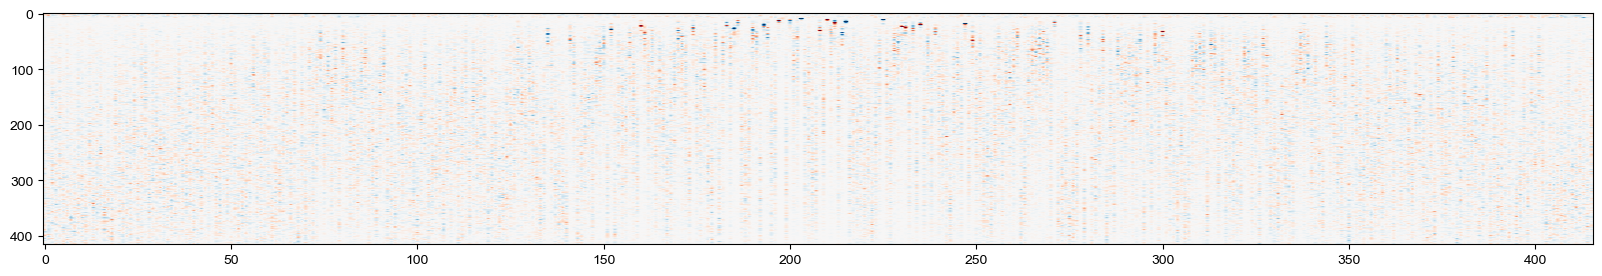

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

init_traj = get_initial_traj(trace, limit=10)
init_traj = preprocess_neural_traj(init_traj, is_ego=True)

#pca = PCA(n_components=30)
#reduced_data_pca = pca.fit_transform(init_traj['neural_traj'].T)

reduced_data_pca = init_traj['neural_traj'].T
lda = LDA(n_components=6, solver="eigen", shrinkage=0.8)
reduced_data = lda.fit_transform(reduced_data_pca, init_traj['ego_pos_traj'])

#N = pca.components_.T
W = M = lda.scalings_
#W = N @ M
C = np.max(W, axis=1)
print(np.max(np.abs(C)))

D = np.argsort(W[:, 0])[::-1]
argidx = np.argsort(C)[::-1]
for i in range(argidx.shape[0]):
    print(init_traj['remain_idx'][D[i]]+1, W[:, 0][D[i]])

fig = plt.figure(figsize=(20, 3))
ax = plt.axes()
ax.imshow(W[D, :].T, cmap='RdBu', vmin=-0.3, vmax=0.3)
ax.set_aspect('auto')
plt.show()

In [6]:
res = visualize_neurotraj3d(
    init_traj, 
    n_components=6, 
    component_i=0,
    component_j=1,
    component_k=2,
    save_dir=os.path.join(loc, "10224"),
    elev=70,
    azim=90,
    method="LDA",
    pos_type="ego_pos_traj",
    train_label='pos',
    is_show=True,
    solver="eigen",
    shrinkage=0.1
)

Dimensional reduction with LDA - 6 components.


ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

        E:\Data\FinalResults\Dsp\0821 - Egocentric Neural Traj\10224 is already existed!


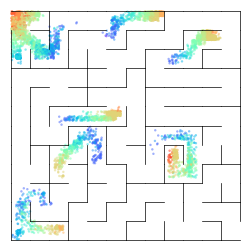

In [72]:
if __name__ == '__main__':
    save_loc = os.path.join(loc, '10224')
    mkdir(save_loc)
    pos = init_traj['pos_traj']
    route_ids = init_traj['traj_route_ids']
    ego_pos = init_traj['ego_pos_traj']
    
        
    vmin, vmax = np.min(ego_pos), np.max(ego_pos)
    colors = np.array(sns.color_palette("rainbow", vmax-vmin+1))
    x, y = (pos-1) % 48, (pos-1) // 48
    x = x + np.random.rand(x.shape[0]) - 0.5
    y = y + np.random.rand(y.shape[0]) - 0.5

    fig = plt.figure(figsize=(3,3))
    ax = Clear_Axes(plt.axes())
    DrawMazeProfile(maze_type=1, axes=ax, nx=48, color='black', linewidth=.5)
    ax.scatter(
        x, 
        y, 
        s = 3, 
        color=colors[ego_pos.astype(np.int64) - vmin],
        alpha=0.5,
        linewidth = 0
    )
    ax.set_aspect('equal')
    ax.axis([-0.8, 47.8, 47.8, -0.8])
    #plt.savefig(os.path.join(save_loc, f'behav.svg'), dpi = 600)
    #plt.savefig(os.path.join(save_loc, f'behav.png'), dpi = 600)
    plt.show()